In [8]:
!. ../.venv/bin/activate
# %matplotlib qt
import pandas as pd
import numpy as np
import mygraph as mg

In [9]:
N0 = {
  "Al": [232685, 230436, 228510],
  "Fe": [214903, 214490, 214679],
  "Pb": [216202, 215654, 214457, 214841]
}
t = 10 # s
N0Al = np.mean(N0['Al']) / t
N0Fe = np.mean(N0['Fe']) / t
N0Pb = np.mean(N0['Pb']) / t
N0Al, N0Fe, N0Pb

(np.float64(23054.366666666665),
 np.float64(21469.066666666666),
 np.float64(21528.85))

In [10]:
dfAl = pd.read_csv('Al.csv', sep='\t')
dfFe = pd.read_csv('Fe.csv', sep='\t')
dfPb = pd.read_csv('Pb.csv', sep='\t')

dfAl['Per second'] = dfAl['N'] / dfAl['t']
dfFe['Per second'] = dfFe['N'] / dfFe['t']
dfPb['Per second'] = dfPb['N'] / dfPb['t']
dfPb.head(2)

,n,N,t,Per second
0,1,116885,10,11688.5
1,2,66332,10,6633.2


In [11]:
N_background = 11031
t_background = 5 * 60 #s
N_background_perS = N_background / t_background

lenAl = 20 # mm
lenFe = 9.9 # mm
lenPb = 4.15 # mm
lenPlug = 19.4 # mm

Коэффиценты прямой: k, s_k, b, s_b
-0.020680896465941158	0.0002675049389387385	9.974812142998093	0.009137033129854274


array([9.55109841, 9.18878267, 8.70948653, 8.30180201, 7.90286828,
       7.50885844])

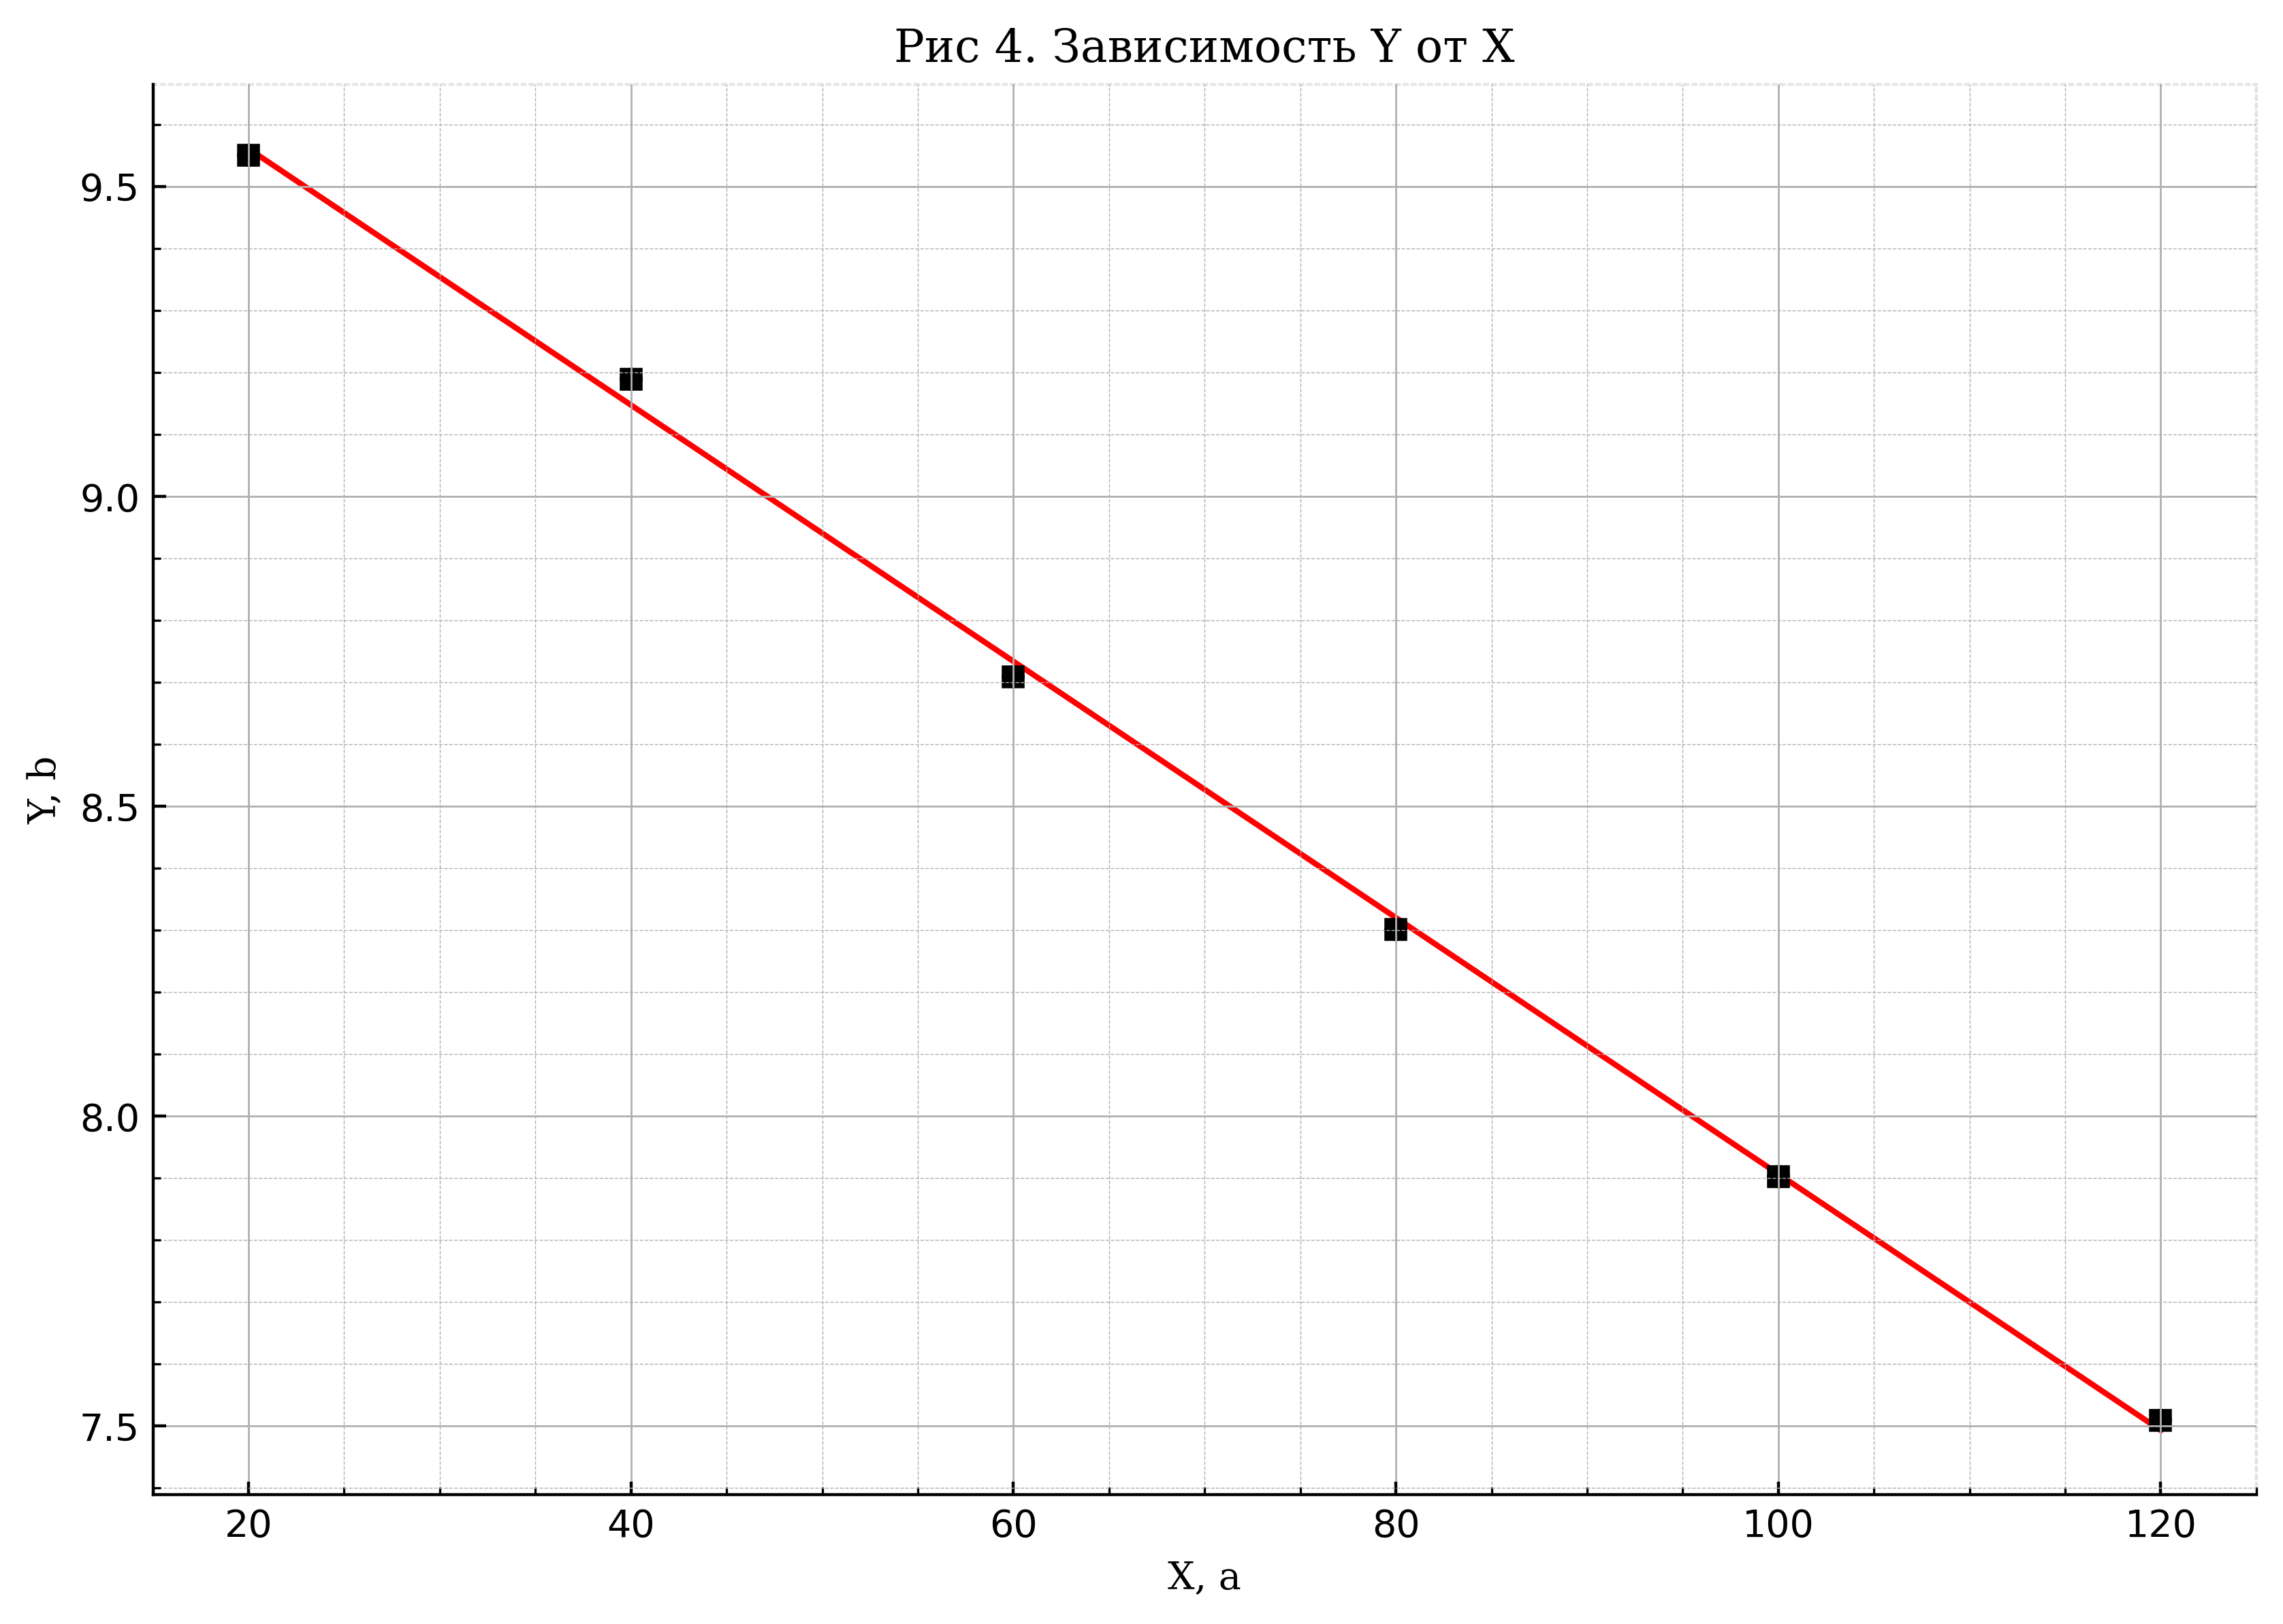

In [12]:
fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, 'Зависимость Y от X')
mg.set_label(ax, 'X, a', 'Y, b')

X = lenAl * dfAl['n']
X = np.array( X )
Y = np.log(dfAl['Per second'] - N_background_perS)
Y = np.array( Y )

k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax, X, Y)
mg.display_linls(ax)
Y

Коэффиценты прямой: k, s_k, b, s_b
-0.05689641066922472	0.0002211081585560801	9.9213122144439	0.0050155621231099


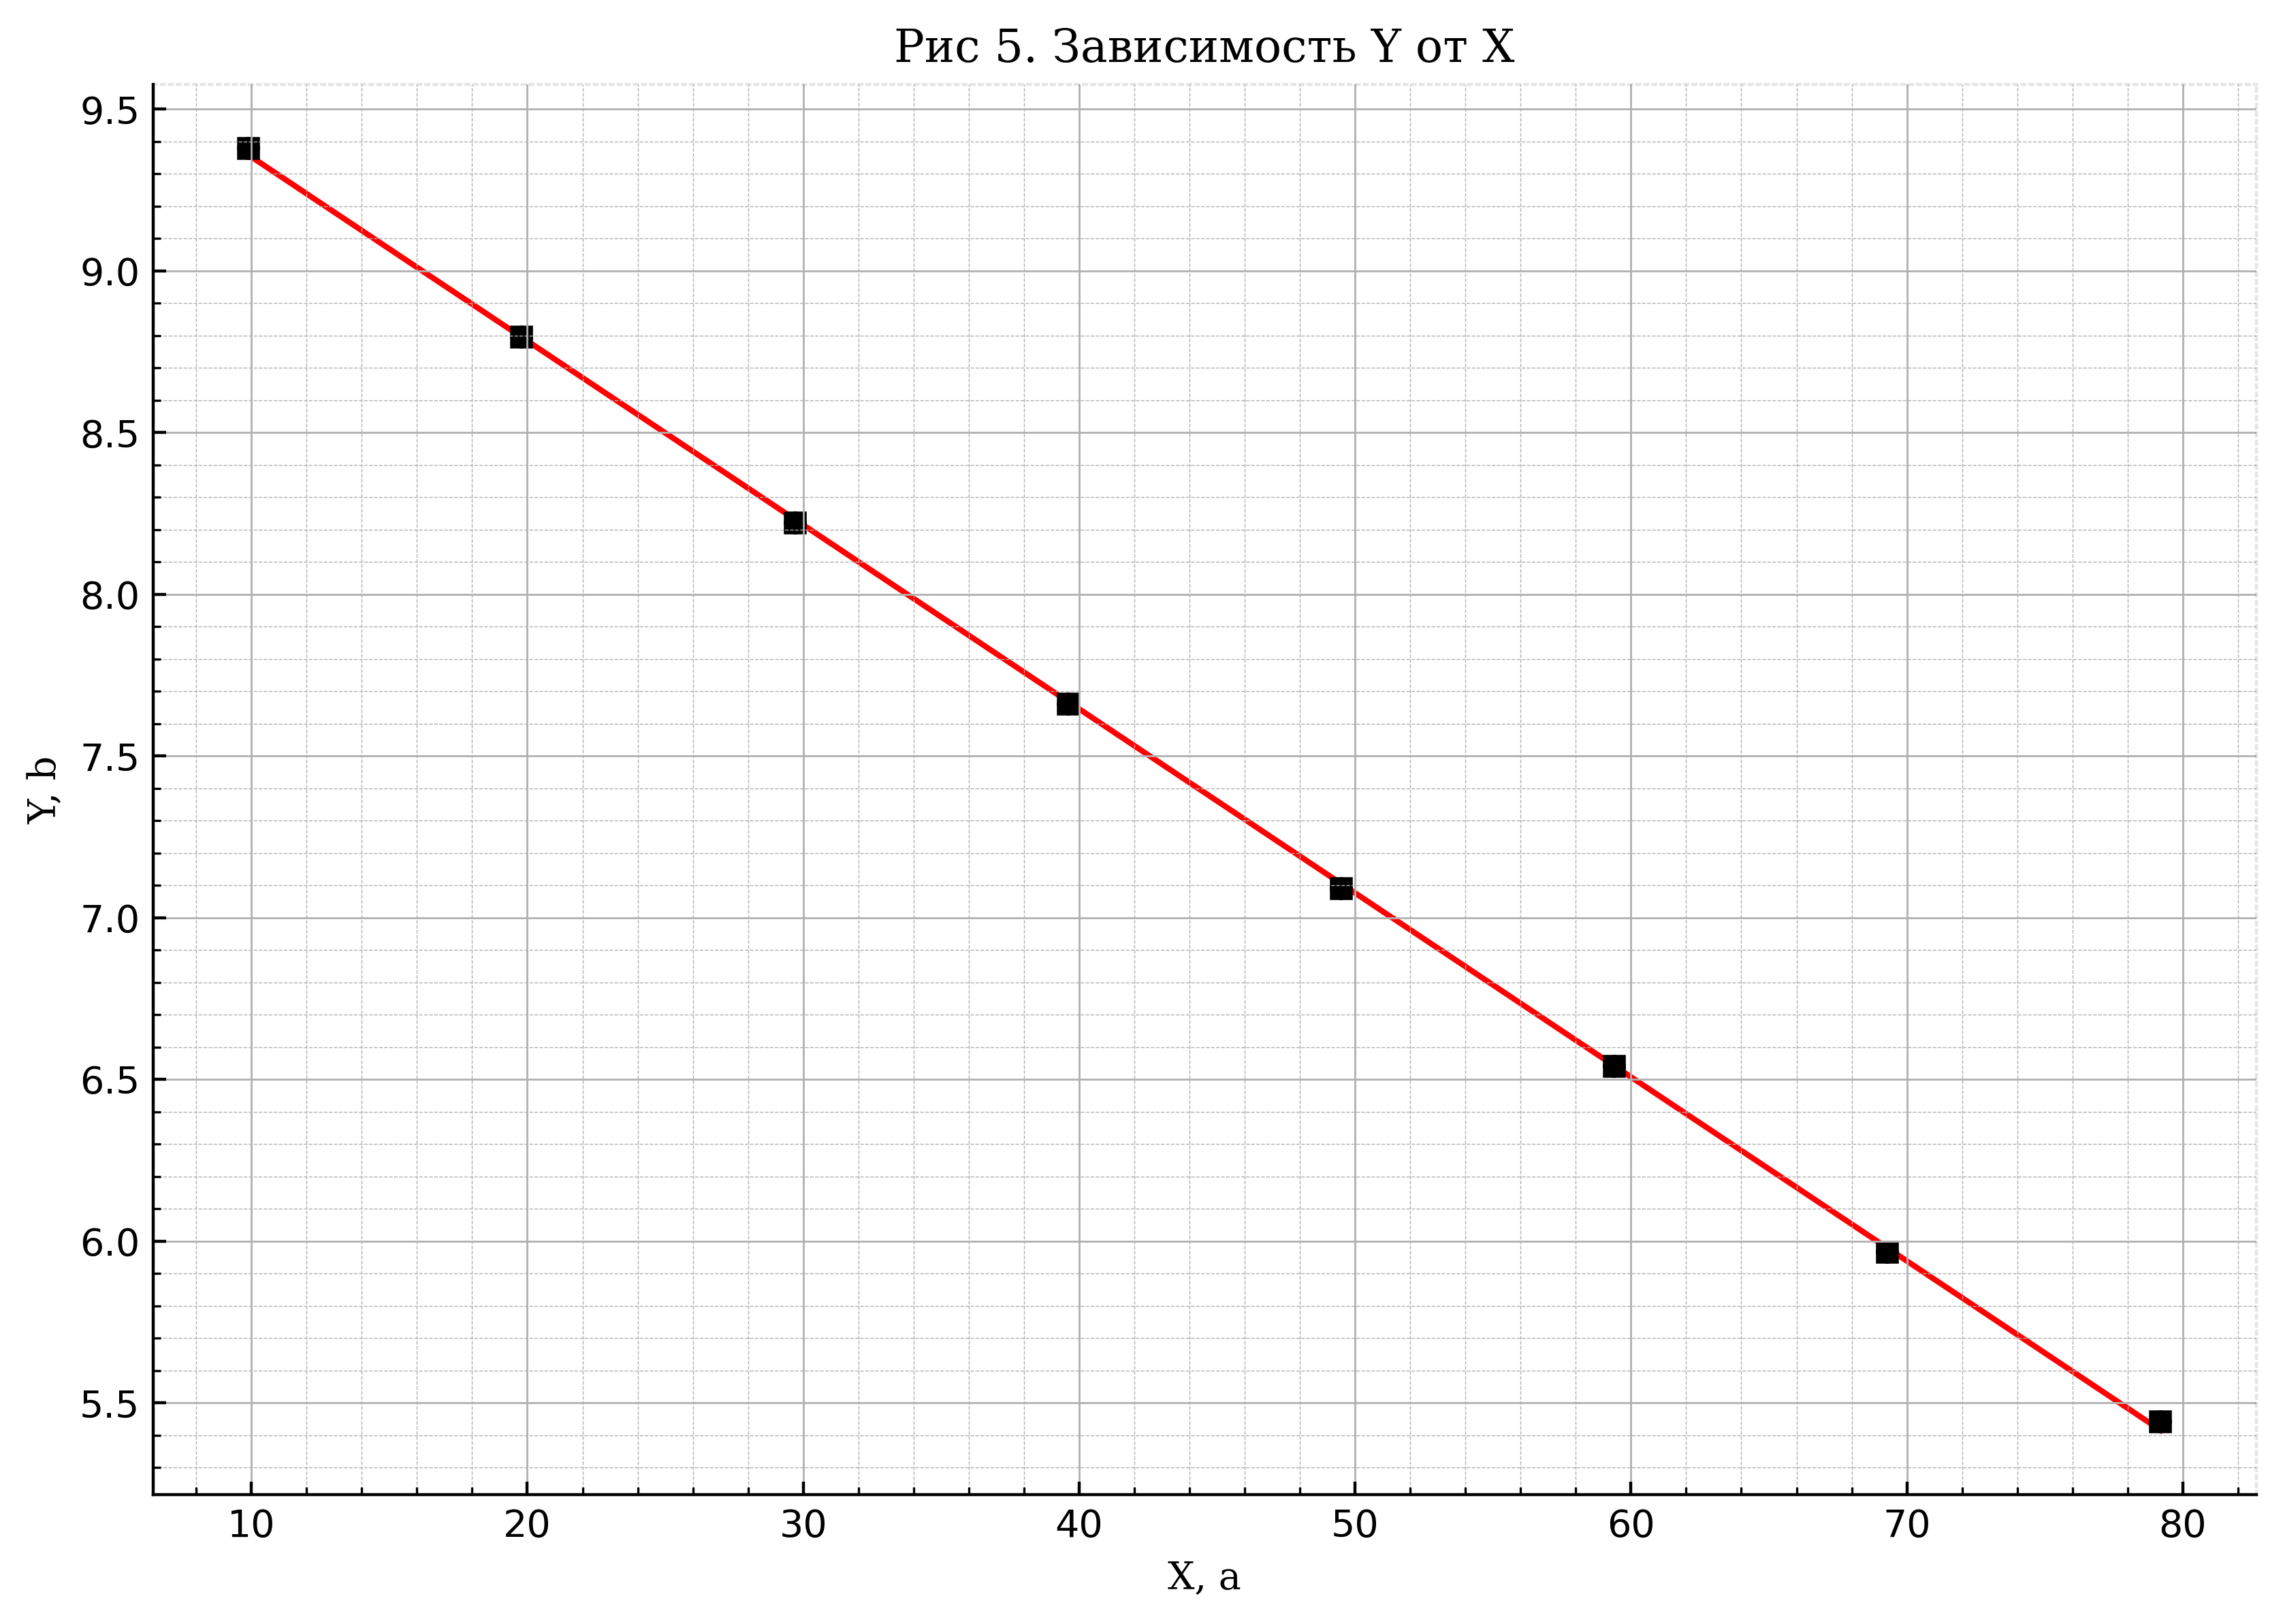

In [13]:
fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, 'Зависимость Y от X')
mg.set_label(ax, 'X, a', 'Y, b')

X = np.array( lenFe * dfFe['n'] )
Y = np.array( np.log(dfFe['Per second'] - N_background_perS) )

k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax, X, Y)
mg.display_linls(ax)

Коэффиценты прямой: k, s_k, b, s_b
-0.12616101384518852	0.00179146591295697	9.821367506347968	0.021354215444696432


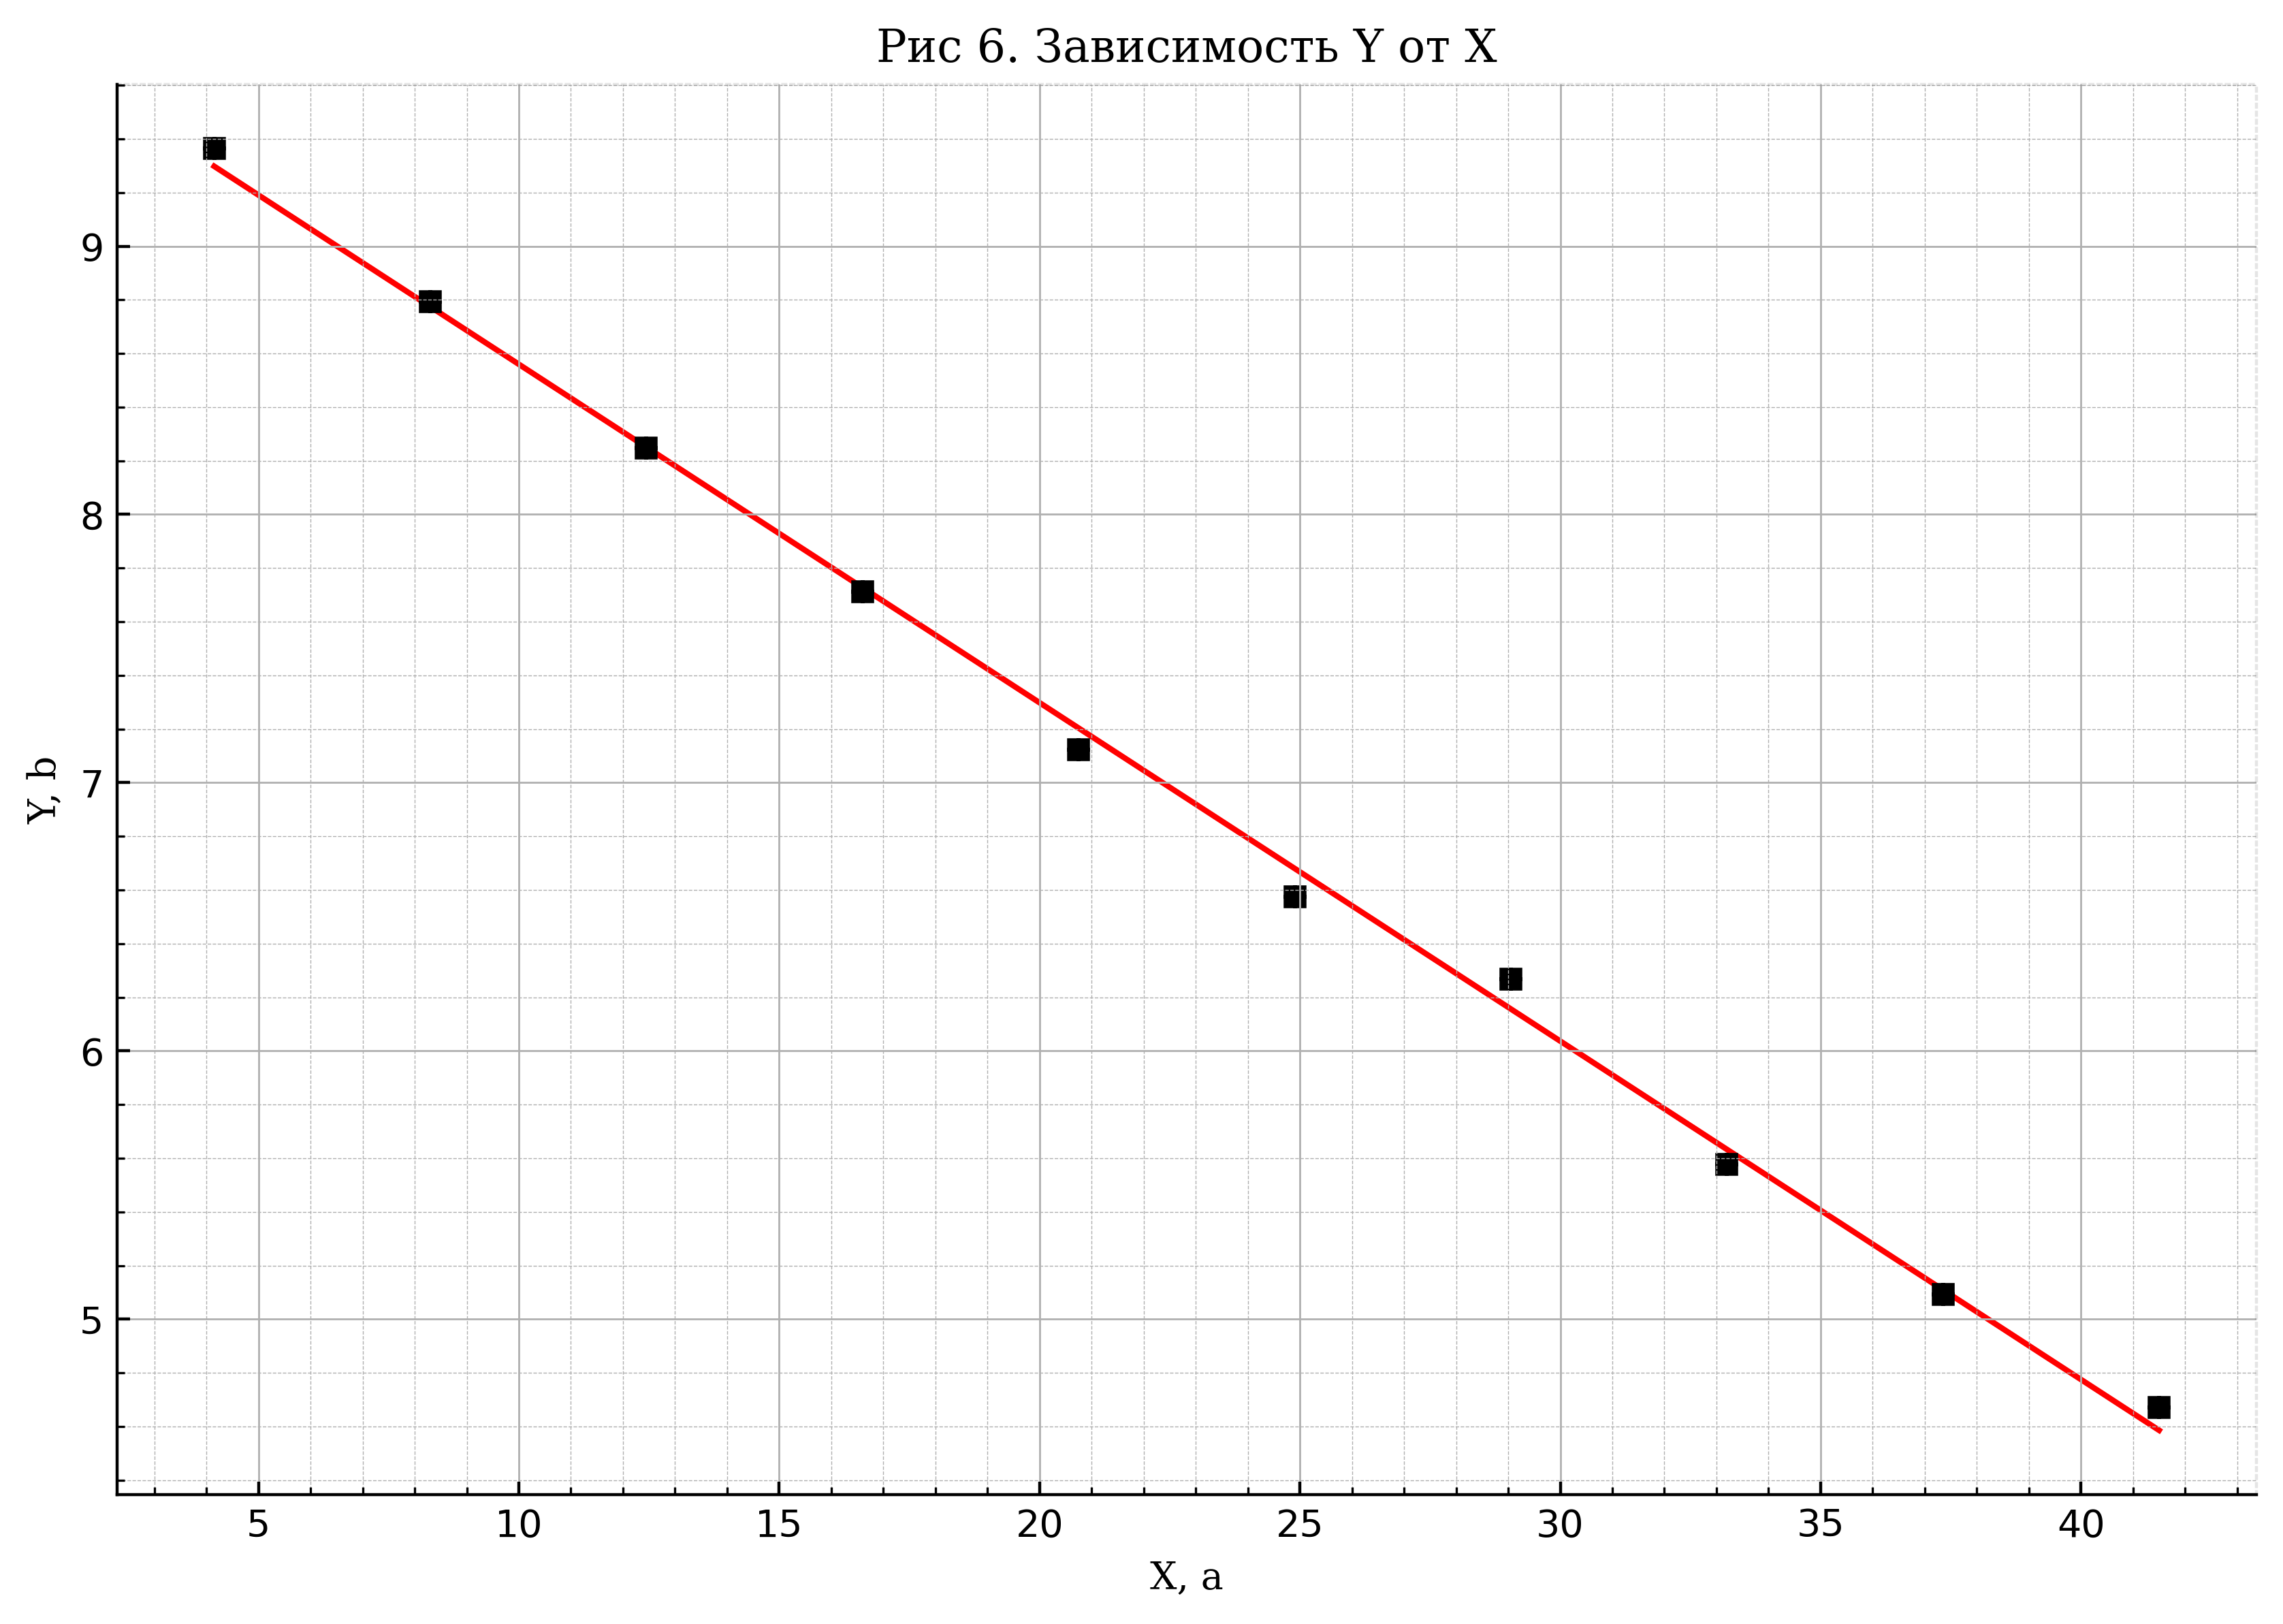

In [14]:
fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, 'Зависимость Y от X')
mg.set_label(ax, 'X, a', 'Y, b')

X = np.array( lenPb * dfPb['n'] )
Y = np.array( np.log(dfPb['Per second'] - N_background_perS) )

k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax, X, Y)
mg.display_linls(ax)